### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter
import scipy.stats as ss
import datetime
from sklearn import preprocessing,model_selection
from tensorflow import keras
import tensorflow as tf

In [3]:
df = pd.read_csv("ml_assignment_data_train.csv")

In [4]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,backers,country,usd_goal_real,new_state
0,The Life and Times of a Nutcracker,Fiction,Publishing,USD,2012-12-01,8000.0,2012-10-26 18:31:19,0,US,8000.00,failed
1,Kochi community outreach 2017,Web,Journalism,GBP,2017-04-28,2000.0,2017-02-27 22:49:51,2,GB,2587.82,failed
2,Get Expert Advice for your Fantasy Football Team,Apps,Technology,USD,2016-09-16,1000.0,2016-08-16 17:54:07,3,US,1000.00,failed
3,Realms of the Ancients (ROTA),Tabletop Games,Games,USD,2013-08-02,30000.0,2013-06-16 00:47:10,49,US,30000.00,failed
4,Innr. Change the way you experience lighting,Product Design,Design,GBP,2013-12-07,50000.0,2013-11-07 17:09:09,165,GB,81349.76,succeeded
5,Mi Temp,Apps,Technology,USD,2014-07-27,6000.0,2014-06-27 15:30:52,8,US,6000.00,failed
6,Day2Night - Convertible High Heel Shoes,Product Design,Design,USD,2011-07-28,15000.0,2011-04-29 18:42:50,121,US,15000.00,succeeded
7,TAPP is a Parent Teacher Communication Innovat...,Software,Technology,USD,2014-06-28,25000.0,2014-05-29 19:34:00,3,US,25000.00,failed
8,The Best Cookies,Food,Food,USD,2014-08-12,10.0,2014-08-02 19:30:54,0,US,10.00,failed
9,Secure your emails. Protect your privacy.,Web,Technology,EUR,2017-05-31,40000.0,2017-04-26 08:47:41,30,DE,44868.20,failed


### looking at how many sample and feature we have, also their type

In [5]:
df.shape

(258325, 11)

In [6]:
df.dtypes

name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
backers            int64
country           object
usd_goal_real    float64
new_state         object
dtype: object

In [7]:
df.isnull().sum()

name             3
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
backers          0
country          0
usd_goal_real    0
new_state        0
dtype: int64

### The data is pretty clean, since we have only 3 names null value. 

### need to change the categorical varibale to numerical variables

In [8]:
le = preprocessing.LabelEncoder()
df['category_id']= le.fit_transform(df.category.astype(str))
df['main_category_id']= le.fit_transform(df.main_category.astype(str))
df['currency_id']= le.fit_transform(df.currency.astype(str))
df['country_id']= le.fit_transform(df.country.astype(str))
df['new_state_id']= le.fit_transform(df.new_state.astype(str))

In [9]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
backers               int64
country              object
usd_goal_real       float64
new_state            object
category_id           int64
main_category_id      int64
currency_id           int64
country_id            int64
new_state_id          int64
dtype: object

### Countries in the order of their count in the data set

In [10]:
df.country.value_counts()

US      203751
GB       22931
CA        9609
AU        5082
DE        2640
FR        1934
NL        1857
IT        1854
ES        1427
SE        1179
MX        1118
NZ         988
DK         712
IE         542
CH         501
NO         449
BE         416
AT         384
HK         365
SG         348
N,0"       176
LU          47
JP          15
Name: country, dtype: int64

### Showing which countries are the most common ones in the data set

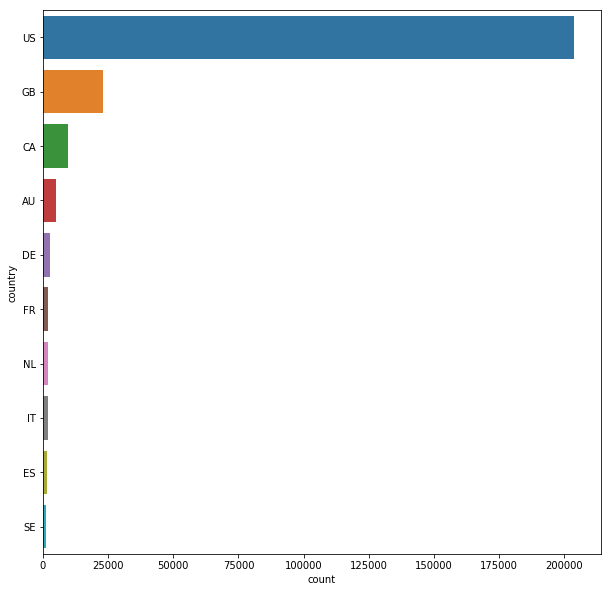

In [11]:
plt.figure(figsize=(10,10))
sb.countplot(y =df.country, order = df.country.value_counts().iloc[:10].index, orient ='v')

### What states do we have in the data set and which one is more often?

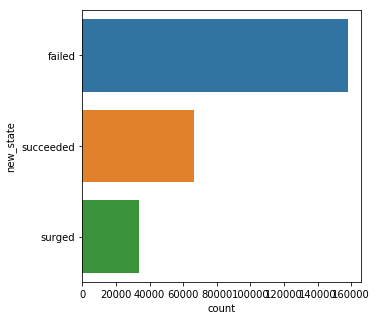

In [12]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.new_state, order = df.new_state.value_counts().iloc[:10].index, orient ='v')

### The 10 most common backers

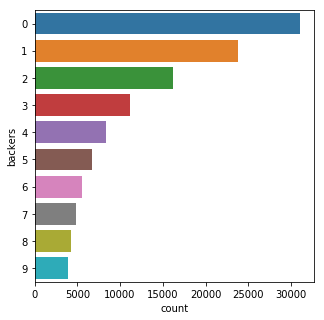

In [13]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.backers, order = df.backers.value_counts().iloc[:10].index, orient ='v')

### Most popular main categories

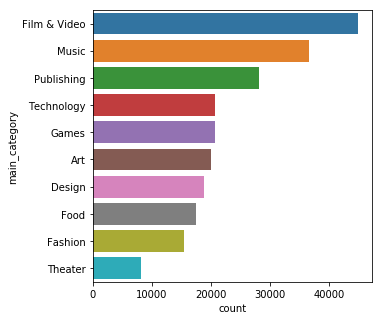

In [14]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.main_category, order = df.main_category.value_counts().iloc[:10].index, orient ='v')

### looking at distribution of usd_goal_real

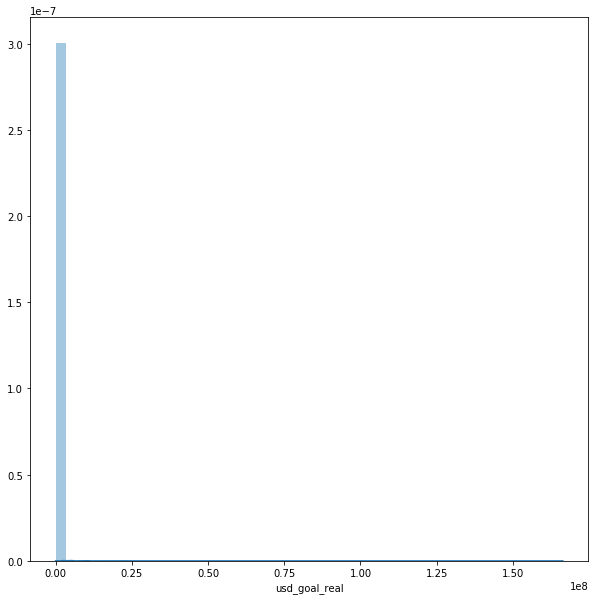

In [19]:
plt.figure(figsize = (10,10))
ax = sb.distplot(df['usd_goal_real'], kde=True)

The distribution is toward 0 and non zero values are not visible, so goals are being converted to log. Although goal is a biased value, I connverted to log but will ignore later. 

In [15]:
df['log_usd_goal_real']=np.log(df['usd_goal_real']+1)

In [16]:
df['log_goal']=np.log(df['goal']+1)

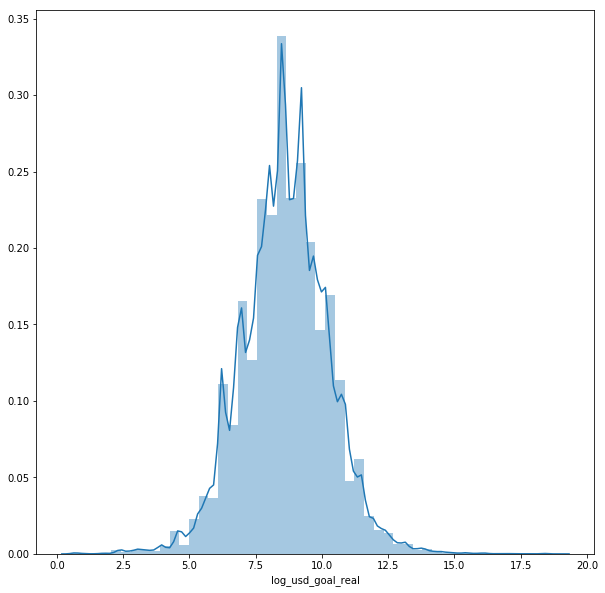

In [22]:
plt.figure(figsize = (10,10))
ax = sb.distplot(df['log_usd_goal_real'], kde=True)

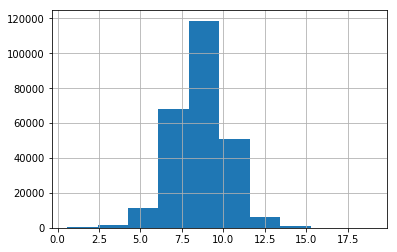

In [23]:
df['log_usd_goal_real'].hist()

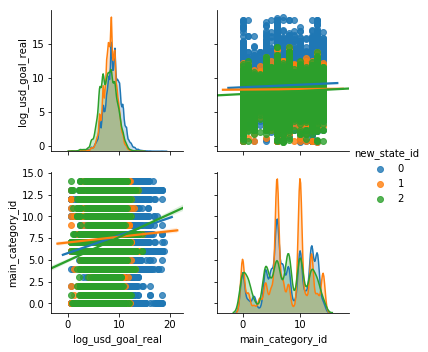

In [24]:
# new state is converted to integers: failed->0   succeeded ->1 , surged ->2
sb.pairplot(df, vars=["log_usd_goal_real", "main_category_id"], kind = 'reg', hue='new_state_id', diag_kind = 'kde')

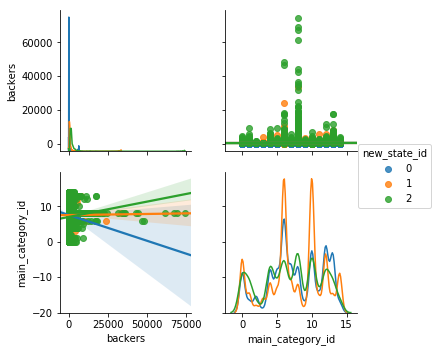

In [58]:
# new state is converted to integers: failed->0   succeeded ->1 , surged ->2
sb.pairplot(trainData, vars=["backers", "main_category_id"], kind = 'reg', hue='new_state_id', diag_kind = 'kde')

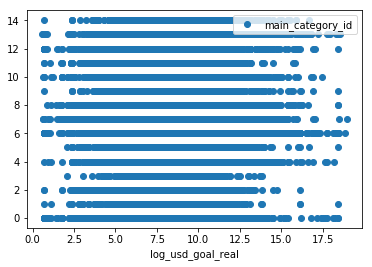

In [26]:
df.plot(x='log_usd_goal_real', y='main_category_id',style='o' )


### most expensive main categories

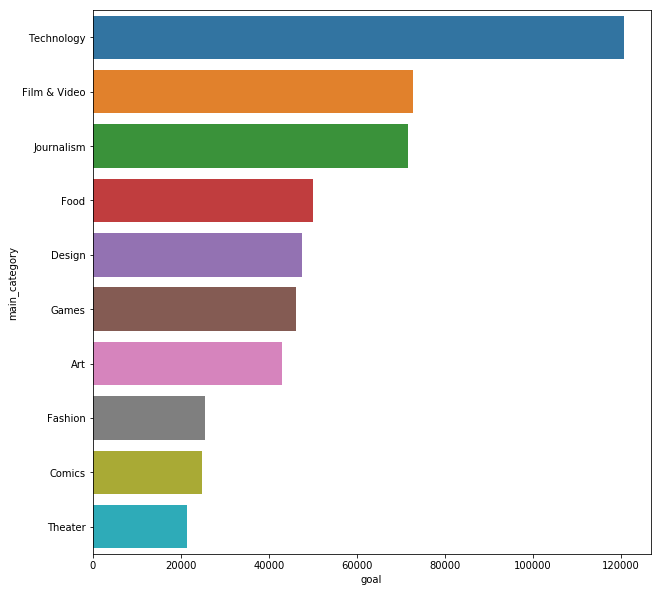

In [18]:
group = df.groupby(df.main_category)
mean_goal = pd.DataFrame(group.goal.mean())
mean_goal = mean_goal.sort_values(by = 'goal', ascending = False).head(10)
mean_goal.reset_index(level =0, inplace = True)

plt.figure(figsize= (10,10))
sb.barplot(x='goal', y='main_category', data = mean_goal, orient = 'h')


In [28]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [29]:
def conditional_entropy(x,y):
# entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

#two categorical cariables
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

### changing the type so that categorical columns such as item_condition_id doesn't have an order

In [30]:
df['backers']= df['backers'].astype('object')
df['category_id']= df['category_id'].astype('object')
df['main_category_id']= df['main_category_id'].astype('object')
df['currency_id']= df['currency_id'].astype('object')
df['new_state_id']= df['new_state_id'].astype('object')
df['country_id']= df['country_id'].astype('object')

In [31]:
df.dtypes

name                  object
category              object
main_category         object
currency              object
deadline              object
goal                 float64
launched              object
backers               object
country               object
usd_goal_real        float64
new_state             object
category_id           object
main_category_id      object
currency_id           object
country_id            object
new_state_id          object
log_usd_goal_real    float64
log_goal             float64
dtype: object

### spliting the launced date to hour and date 

In [32]:
df['launched_date'], df['launched_hour'] = df['launched'].str.split(' ',2).str

In [33]:
df['launched_date'] = pd.to_datetime(df['launched_date'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['time_interval']= df['launched_date'] - df['deadline']

In [34]:
df.dtypes

name                          object
category                      object
main_category                 object
currency                      object
deadline              datetime64[ns]
goal                         float64
launched                      object
backers                       object
country                       object
usd_goal_real                float64
new_state                     object
category_id                   object
main_category_id              object
currency_id                   object
country_id                    object
new_state_id                  object
log_usd_goal_real            float64
log_goal                     float64
launched_date         datetime64[ns]
launched_hour                 object
time_interval        timedelta64[ns]
dtype: object

In [35]:
df['time_interval']

0        -36 days
1        -60 days
2        -31 days
3        -47 days
4        -30 days
5        -30 days
6        -90 days
7        -30 days
8        -10 days
9        -35 days
10       -30 days
11       -40 days
12       -30 days
13       -21 days
14       -32 days
15       -30 days
16       -27 days
17       -30 days
18       -30 days
19       -45 days
20       -52 days
21       -20 days
22       -28 days
23       -25 days
24       -21 days
25       -30 days
26       -30 days
27       -30 days
28       -19 days
29       -30 days
           ...   
258295   -34 days
258296   -20 days
258297   -45 days
258298   -30 days
258299   -30 days
258300   -30 days
258301   -28 days
258302   -30 days
258303   -30 days
258304   -30 days
258305   -25 days
258306   -60 days
258307   -60 days
258308   -30 days
258309   -14 days
258310   -21 days
258311   -30 days
258312   -40 days
258313   -30 days
258314   -21 days
258315   -30 days
258316   -30 days
258317   -30 days
258318   -32 days
258319   -

### removing days from time_interval and changing it to numerics

In [36]:
df['time_interval_int'] = df['time_interval'] / np.timedelta64(1, 'D')

In [37]:
df['time_interval_int'].dtype

dtype('float64')

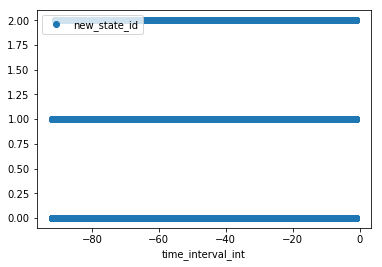

In [38]:
df.plot(x='time_interval_int', y='new_state_id',style='o')

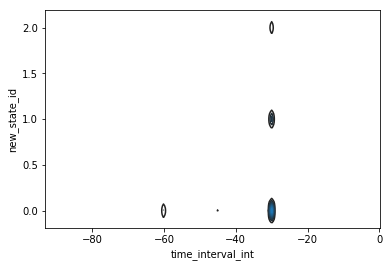

In [53]:
sns.kdeplot(df.time_interval_int, df.new_state_id)

new state is converted to integers: failed->0   succeeded ->1 , surged ->2
Size of circle shows the density of the data in that area. Most of projects are being delivered 30 days sooner that the deadline. Most of the projects that delivered 60 days sooner than the deadline, failed. 

In [39]:
import datetime
df['deadline'] = pd.to_datetime(df['deadline'])

In [40]:
df['deadline'].dtypes

dtype('<M8[ns]')

### how the state could change in time

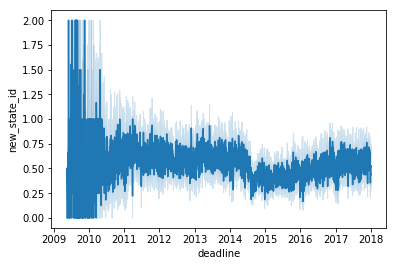

In [27]:
# new state is converted to integers: failed->0   succeeded ->1 , surged ->2

import seaborn as sns
sns.lineplot(data = df, x='deadline', y = 'new_state_id')

### How the goal changes in time 

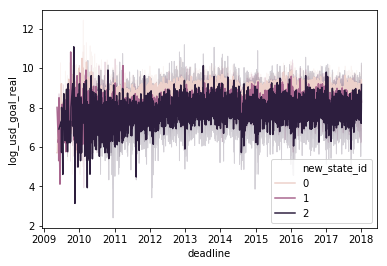

In [28]:
# new state is converted to integers: failed->0   succeeded ->1 , surged ->2

import seaborn as sns
sns.lineplot(data = df, x='deadline', y = 'log_usd_goal_real' , hue = 'new_state_id')

In [41]:
df['time_interval'].dtype

dtype('<m8[ns]')

In [42]:
df['time_interval']= df['time_interval'].dt.days

### Spliting the deadline into year, month and day

In [43]:
df['deadline_year'] = df['deadline'].dt.year
df['deadline_month'] = df['deadline'].dt.month
df['deadline_day'] = df['deadline'].dt.day

In [44]:
df['time_interval'].dtype

dtype('int64')

### Finding all relations in the date set
correlation for numerics
theils_u for categorical
correlation_ratio for categorical and numerics
this code finallly scales all to -1,1 to compare

In [70]:
#item_desription is all text, so dropping that to speed up the processing time
# generally removing datapoints that can be rarely related to the label or they will cause the runnign time to forever
df_copy= df.drop(['name'],axis= 1)
df_copy= df_copy.drop(['category_id'],axis= 1)
df_copy= df_copy.drop(['deadline'],axis= 1)
df_copy= df_copy.drop(['launched'],axis= 1)
df_copy= df_copy.drop(['main_category_id'],axis= 1)
df_copy= df_copy.drop(['currency_id'],axis= 1)
df_copy= df_copy.drop(['country_id'],axis= 1)
df_copy= df_copy.drop(['new_state_id'],axis= 1)
df_copy= df_copy.drop(['goal'],axis= 1)
df_copy= df_copy.drop(['log_goal'],axis= 1)
df_copy= df_copy.drop(['usd_goal_real'],axis= 1)
df_copy= df_copy.drop(['launched_date'],axis= 1)
df_copy= df_copy.drop(['launched_hour'],axis= 1)
df_copy= df_copy.drop(['time_interval'],axis= 1)

In [71]:
df['deadline_year'] = df.deadline_year.astype(float)
df['deadline_month'] = df.deadline_year.astype(float)
df['deadline_day'] = df.deadline_year.astype(float)

In [72]:
df_copy.dtypes

category              object
main_category         object
currency              object
backers               object
country               object
new_state             object
log_usd_goal_real    float64
time_interval_int    float64
deadline_year        float64
deadline_month       float64
deadline_day         float64
dtype: object

In [73]:
relations = pd.DataFrame()
columns = df_copy.columns[1:len(df_copy.columns)]#columns labels
rows = df_copy.columns[1:len(df_copy.columns)] # rows     
for j in range(0,len(columns)):
    for i in range(0,len(rows)):
        if (df_copy[columns[j]].dtypes == 'float64'  and df_copy[rows[i]].dtypes == 'float64'):
            u = df_copy[columns[j]].corr( df_copy[rows[i]])
            u = u*1
            relations.loc[rows[i],columns[j]] = u
        elif  (df_copy[rows[i]].dtypes == 'O' and df_copy[columns[j]].dtypes == 'float64'):
            u = correlation_ratio(df_copy[rows[i]], df_copy[columns[j]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
        elif (df_copy[columns[j]].dtypes == 'O' and df_copy[rows[i]].dtypes == 'float64' ):
            u = correlation_ratio(df_copy[columns[j]], df_copy[rows[i]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
        elif (df_copy[columns[j]].dtypes == 'O' and df_copy[rows[i]].dtypes == 'O'):
            u = theils_u(df_copy[columns[j]], df_copy[rows[i]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
relations.fillna(value=np.nan,inplace=True)

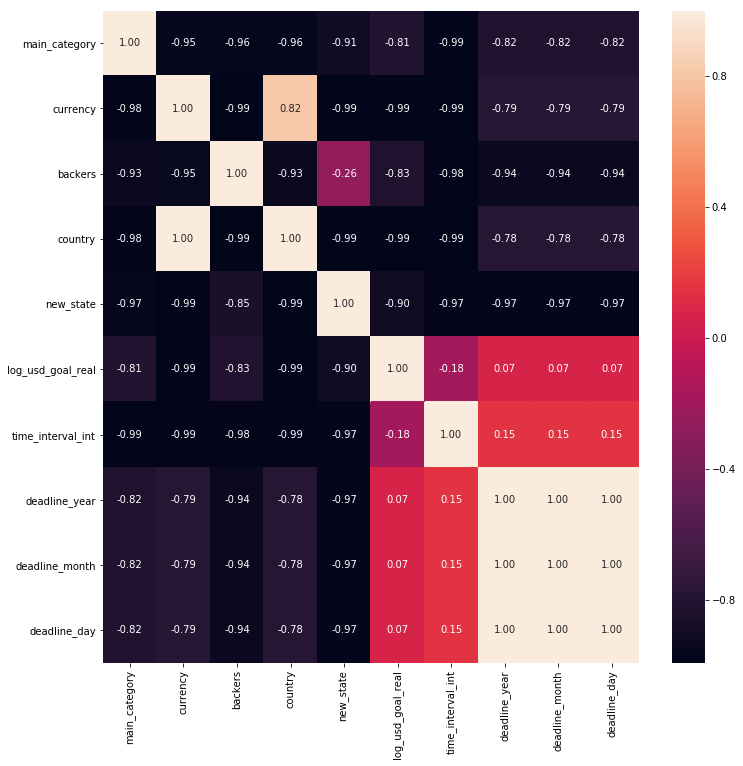

In [74]:
plt.figure(figsize=(12,12))
sb.heatmap(relations,annot=True,fmt='.2f')
plt.show()

#### new state is the lable that we want to predict, the most correlated feature is backer. Most of features don't have a strong correlation with the label. That means that probebly a linear model such as regression or linear SVM should not give us a good result